In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import time
import shutil
import os
import random
import cv2
import math
import json
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


import keras
from keras.preprocessing.image import *
from keras.models import Sequential, Model
from keras.layers import Convolution2D, Flatten, Lambda, MaxPooling2D, Cropping2D, AveragePooling2D,BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import Callback
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from IPython.display import display # Allows the use of display() for DataFrames

# Visualizations will be shown in the notebook.
%matplotlib inline

Using TensorFlow backend.


In [2]:
data_dir = 'data'
columns = ['center', 'left', 'right', 'steering_angle', 'throttle', 'brake', 'speed']
data = pd.read_csv(data_dir + '/driving_log.csv', header=None, names=columns)

In [3]:
# flip images horizontally
def horizontal_flip(img):
    flipped_image = cv2.flip(img, 1)
    return flipped_image

In [4]:
CAMARA_ANGLE = 0.3


def preprozess_line(line_data, training=False):
    x, y = [], []
    y_steer = line_data['steering_angle']
    path_center = line_data['center'].strip()
    
     # read image
    image_path = os.path.join(data_dir, path_center)
    image = cv2.imread(image_path)

    x.append(image)
    y.append(y_steer)

    return np.array(x), np.array(y)

In [5]:
def generator(records, batch_size=32, training=False):
    while True:
        num_records = len(records)
        filter_indices = np.random.randint(0, num_records, batch_size)
        images =[]
        angles = []
        for line_indice in filter_indices:
            line =  data.iloc[line_indice]
            X_gen, Y_gen = preprozess_line(line, training);
            images.extend(X_gen)
            angles.extend(Y_gen)

        X = np.array(images)
        y = np.array(angles)

        # output a batch increment
        yield X, y

In [6]:
gen = generator( data, batch_size=500, training=True)        
x, y = next( gen )

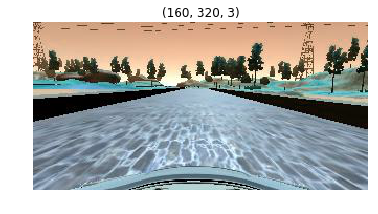

In [7]:
def showImage(image, title):
    plt.subplot(1, 1, 1)
    plt.axis('off')
    plt.title(title)
    plt.imshow(image)
    plt.show()
    
img = x[0]    
showImage(img, img.shape)



In [8]:
model = Sequential()
model.add(Flatten(name="Flatten", input_shape=[160, 320, 3]))
model.add(Dense(1, name="Steering"))

model.compile(optimizer='adam', loss='mse')

history_object = model.fit(x, y, validation_split=0.2, shuffle=True)

Train on 400 samples, validate on 100 samples
Epoch 1/10
400/400 [==============================] - 0s - loss: 59120487.8641 - val_loss: 45981044.8000
Epoch 2/10
400/400 [==============================] - 0s - loss: 17232733.5500 - val_loss: 776236.6200 - ETA: 0s - loss: 18028102.5875
Epoch 3/10
400/400 [==============================] - 0s - loss: 3784605.5400 - val_loss: 4167391.9000

In [9]:
model.save("model.h5")
print("Saved model")

Saved model


dict_keys(['val_loss', 'loss'])


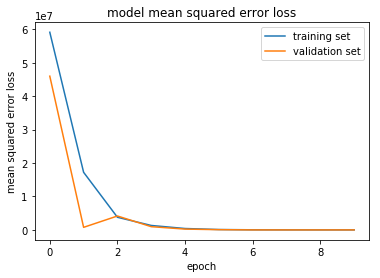

In [10]:
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()